### Machine Learning models. 

In this process we will use some machine learning models in order to see how is the performance on each one. 

In [1]:
#%pip install seaborn

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

from ml_models import ml_models


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'ml_models'

#### Data ready to go.

In [ ]:
# Open the HDF5 file
with pd.HDFStore('data_etl.h5', mode='r') as store:
    # Get the keys (structure) within the HDF5 file
    keys = store.keys()
# Display the keys
print("Keys in the HDF5 file:")
for key in keys:
    print(key)

Keys in the HDF5 file:
/X_test
/X_test_pca
/X_train
/X_train_pca
/y_test
/y_train


In [ ]:
with pd.HDFStore('data_etl.h5', mode='r') as store:
    # Get the keys (structure) within the HDF5 file
    keys = store.keys()
    # Access and retrieve specific DataFrames
    X_train = store.get('/X_train')
    X_test = store.get('/X_test')
    X_train_pca = store.get('/X_train_pca')
    X_test_pca = store.get('/X_test_pca')
    y_train = store.get('/y_train')
    y_test = store.get('/y_test')

#### ML models.

In [ ]:
message = "Iteration 1"

#### Linear Regresion

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Initialize the Linear Regression model
linear = ml_models(model)

In [ ]:
linear.fit_model(X_train, y_train)
y_pred = linear.predict(X_test, y_test)
score = linear.score(X_test, y_test)

linear.log_message(message)

In [ ]:
# Calculate other evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Print and log evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {score:.4f}")
#print(f"Adjusted R-squared: {adj_r2:.4f}")

Mean Squared Error (MSE): 0.0424
Mean Absolute Error (MAE): 0.1174
R-squared (R²): 0.2031


Not a good result.

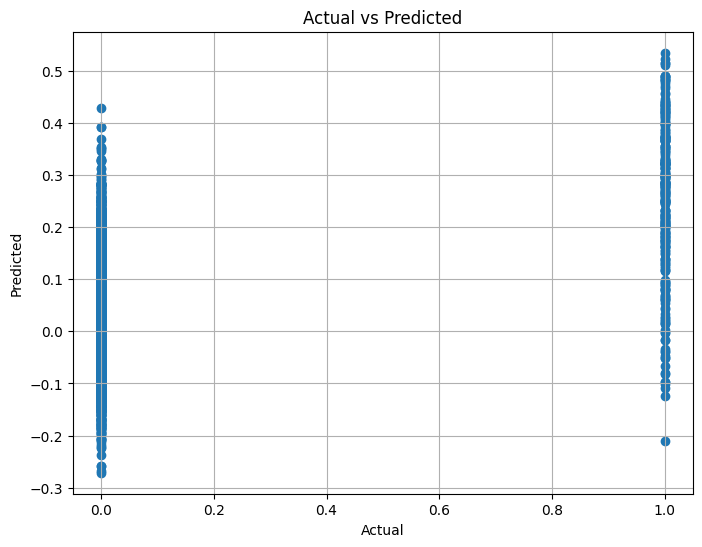

In [ ]:
import seaborn as sns
# Plotting y_test against y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

#### Logistic regresion

In [ ]:
# Initialize the Linear Regression model
model = LogisticRegression()
model

LogisticRegression()

In [ ]:
# Initialize the Linear Regression model
logistic = ml_models(model)

In [ ]:
logistic.fit_model(X_train, y_train)
y_pred = logistic.predict(X_test, y_test)
score = logistic.score(X_test, y_test)

logistic.log_message(message)

c:\Users\luisa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Taking the probabilities of the positive class

Accuracy: 0.9650


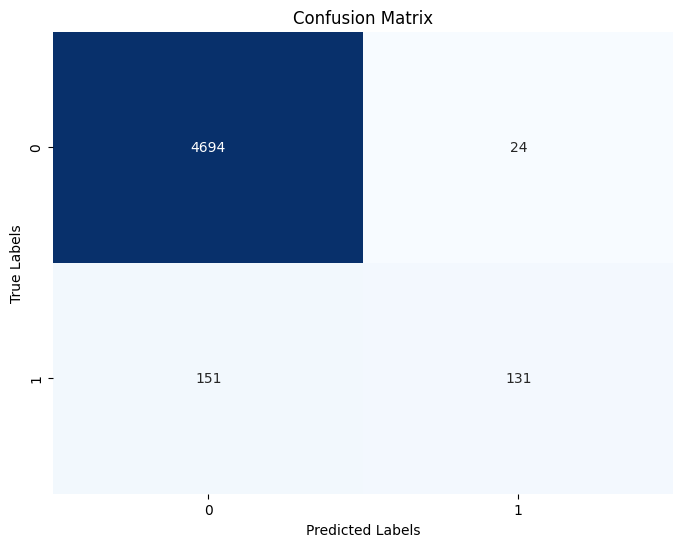

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4718
           1       0.85      0.46      0.60       282

    accuracy                           0.96      5000
   macro avg       0.91      0.73      0.79      5000
weighted avg       0.96      0.96      0.96      5000



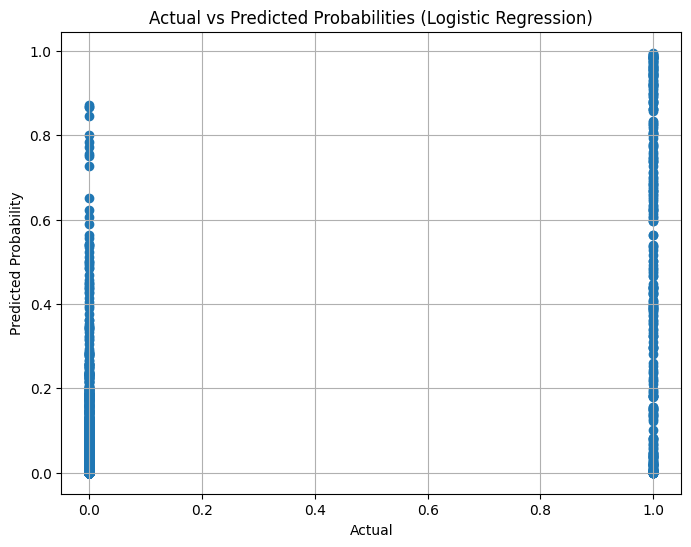

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


# Generate confusion matrix
cm_log = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting predicted probabilities against actual classes
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_proba)
plt.title('Actual vs Predicted Probabilities (Logistic Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted Probability')
plt.grid(True)
plt.show()

#### Random Forest

In [ ]:
# Initialize the Linear Regression model
model = RandomForestClassifier()
model

RandomForestClassifier()

In [ ]:
# Initialize the Linear Regression model
random_forest = ml_models(model)

random_forest.fit_model(X_train, y_train)
y_pred = random_forest.predict(X_test, y_test)
score = random_forest.score(X_test, y_test)

random_forest.log_message(message)

c:\Users\luisa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9836


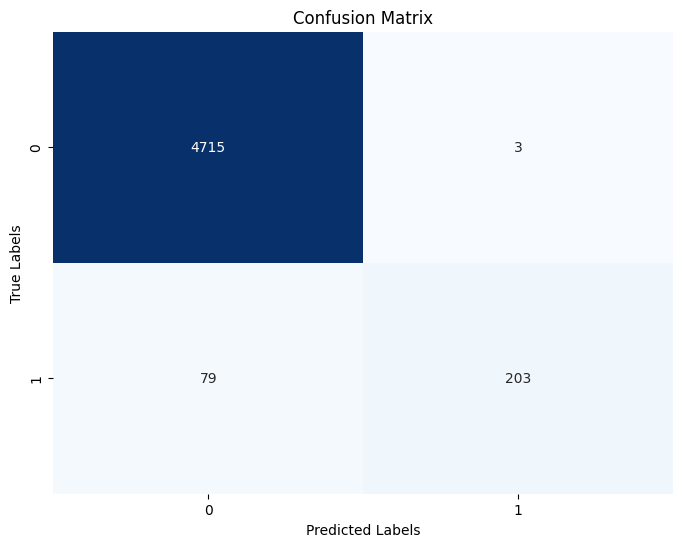

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### No-Supervised

c:\Users\luisa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


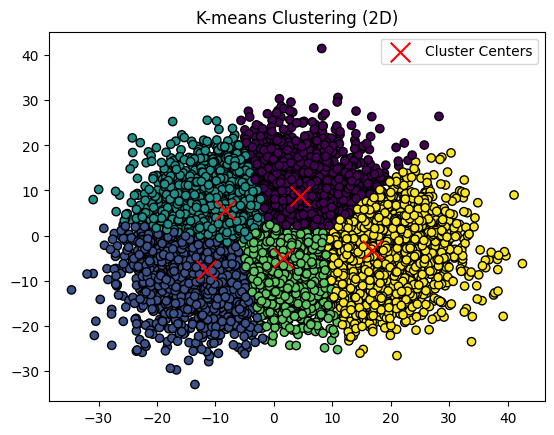

In [ ]:
from sklearn.decomposition import PCA

# Assuming X is your data for clustering

# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Fit KMeans to the reduced data
kmeans.fit(X_pca)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='black')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
plt.title('K-means Clustering (2D)')
plt.legend()
plt.show()

#### Neuronal Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Epoch 1/10


625/625 [==============================] - 4s 4ms/step - loss: 0.0931 - accuracy: 0.9737 - val_loss: 0.0741 - val_accuracy: 0.9876
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0533 - accuracy: 0.9901 - val_loss: 0.0657 - val_accuracy: 0.9884
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0481 - accuracy: 0.9912 - val_loss: 0.0580 - val_accuracy: 0.9902
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0440 - accuracy: 0.9922 - val_loss: 0.0585 - val_accuracy: 0.9900
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0429 - accuracy: 0.9924 - val_loss: 0.0593 - val_accuracy: 0.9898
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0413 - accuracy: 0.9923 - val_loss: 0.0614 - val_accuracy: 0.9898
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0394 - accuracy: 0.9927 - val_loss: 0.0573 - val_accuracy: 0.9900
Ep

Epoch 1/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0352 - accuracy: 0.9937 - val_loss: 0.0621 - val_accuracy: 0.9896
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0348 - accuracy: 0.9933 - val_loss: 0.0586 - val_accuracy: 0.9900
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0346 - accuracy: 0.9932 - val_loss: 0.0592 - val_accuracy: 0.9900
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0324 - accuracy: 0.9938 - val_loss: 0.0613 - val_accuracy: 0.9908
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0322 - accuracy: 0.9936 - val_loss: 0.0599 - val_accuracy: 0.9898
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0314 - accuracy: 0.9936 - val_loss: 0.0632 - val_accuracy: 0.9902
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0307 - accuracy: 0.9938 - val_loss: 0.0630 - val_accuracy: 0.9908
Epoch 

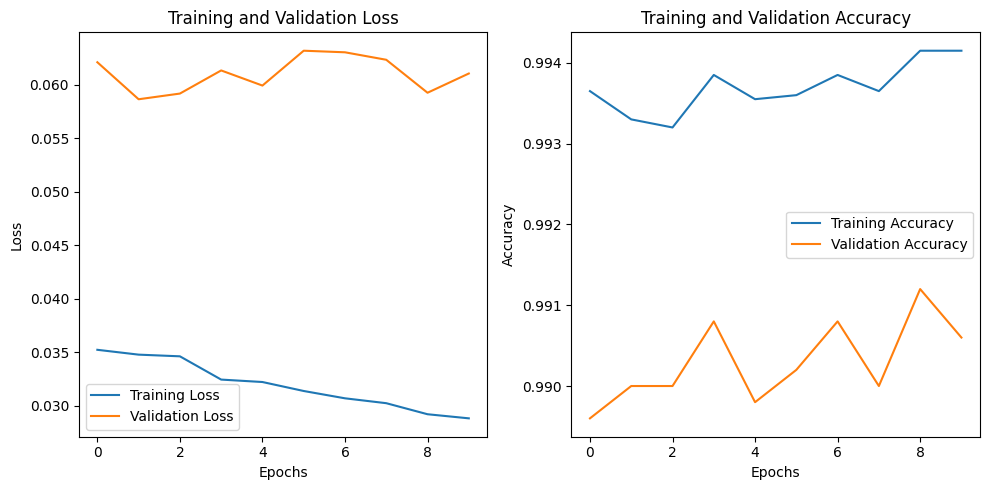

In [ ]:
import matplotlib.pyplot as plt

# Fit the model to the training data and collect history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Extract loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()